# JAAS 2019 - Procesamiento de Señales en Python
## Clase Extra: LibROSA

![](imagenes/workshop_logo_300x200.png)

## LibROSA

LibROSA es un paquete de Python para análisis de música y audio. Proporciona los bloques de construcción necesarios para crear sistemas de recuperación de información musical.

### Documentacion

LibROSA tiene una documentacion muy extensa con diversos ejemplos e implementaciones. Ante cualquier duda es recomendable consultarla:
https://librosa.github.io/librosa/    

### Instalacion
Hay dos formas de hacer la instacion, usando pip o conda desde la terminal:

`pip install librosa`

`conda install -c conda-forge librosa`

Una vez instalada, podemos ver que version estamos usando:

In [7]:
import librosa
print(librosa.__version__)

0.6.2


### Convenciones
* Todos los audios son del tipo `numpy` y los llamamos `y` 
* Al sampling rate lo guardamos como `sr`

### Importamos librarias

In [33]:
import numpy as np
import pandas as pd

import librosa

%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

%pylab inline
import os
import glob 
import IPython.display as ipd

Populating the interactive namespace from numpy and matplotlib


### Cargar audio
Ya podemos empezar a trabajar. Vamos a importar un audio que tenemos guardado en nuestra computadora:

In [8]:
y, sr = librosa.load('../audio/clarinete.wav')

Veamos el sample rate del audio:

In [9]:
sr

22050

Vemaos la longitud del numpy array (cantidad de muestras):

In [12]:
print(len(y))

321006


Para calcular la duracion en segundos usando librosa:

In [20]:
print(librosa.samples_to_time(len(y), sr))

14.558095238095238


Otra forma mas simple:

In [28]:
len(y)/ sr

14.558095238095238

### Escuchar audio
Para poder escuchar los audios que cargamos desde Jupyter Notebook vamos a importar la siguiente libreria:

In [29]:
import IPython.display as ipd

In [31]:
ipd.Audio('../audio/clarinete.wav')

### Visualizamos Audio

#### Waveform

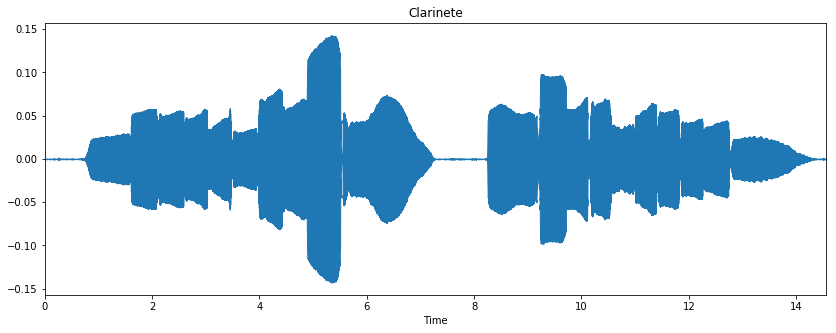

In [43]:
plt.figure(figsize=(14, 5))

plt.title('Clarinete')
librosa.display.waveplot(y, sr=sr)

### Zooming in
Si quiesieramos graficar una sola parte de la senal

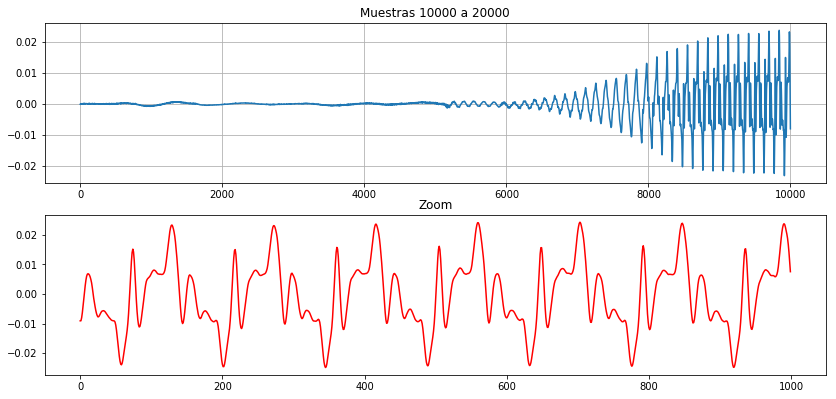

In [59]:
n0 = 10000
n1 = 20000
n2 = 21000
plt.figure(figsize=(14, 10))

plt.subplot(311)
plt.title('Muestras 10000 a 20000')
plt.plot(y[n0:n1])
plt.grid()

plt.subplot(312)
plt.title('Zoom')
plt.plot(y[n1:n2], 'r')

### Espectrograma

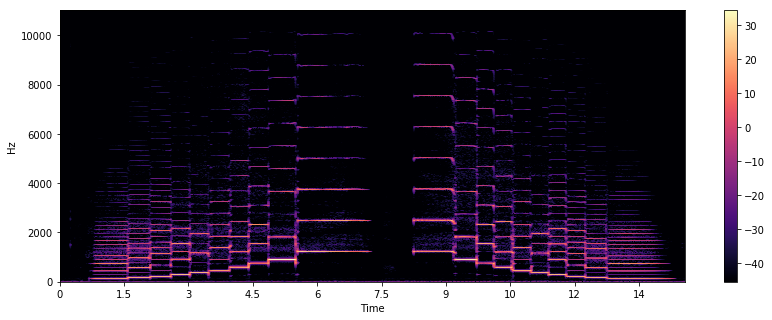

In [41]:
X = librosa.stft(y)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

El eje vertical muestra frecuencias de 0 a 10 kHz, y el eje horizontal muestra el tiempo del audio. Si quisieramos tener mas resolucion en bajas frecuencias, podemos convertir el eje de frecuencia en uno logarítmico:

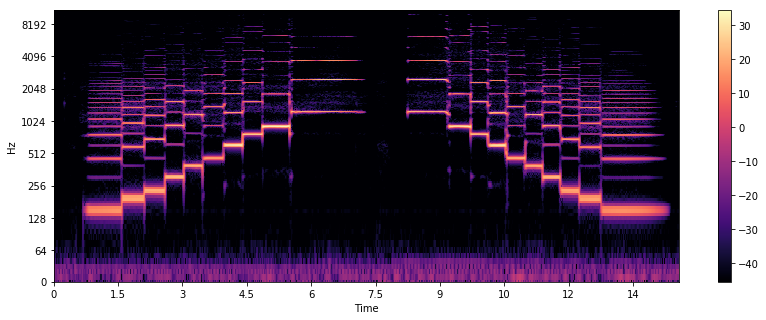

In [42]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

### FFT

Frequency sampling 22050
Channels 1
Complete Samplings N 321006
secs 14.558095238095238
Timestep between samples Ts 4.5351473922902495e-05


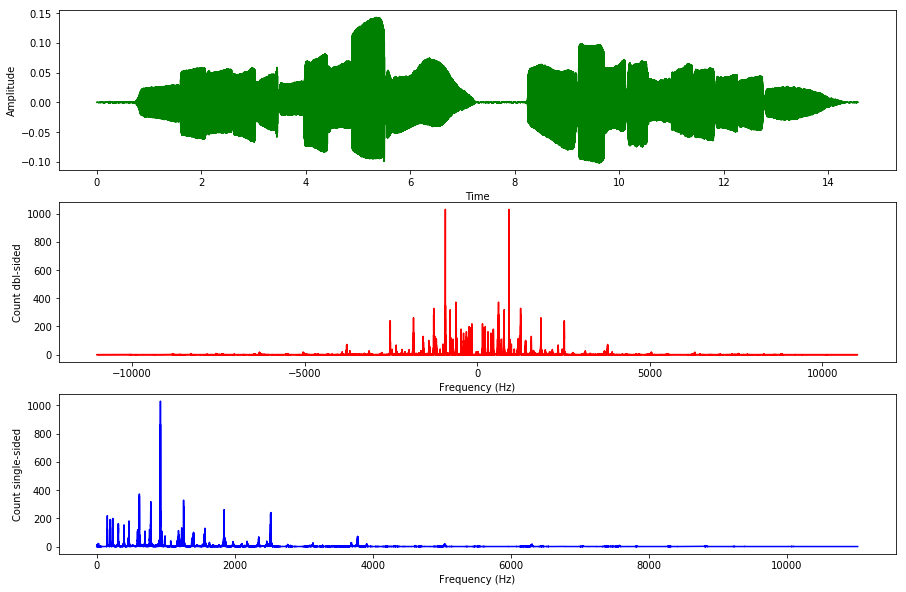

In [57]:
from __future__ import print_function
import scipy.io.wavfile as wavfile
import scipy
import scipy.fftpack
import numpy as np
from matplotlib import pyplot as plt

signal, fs_rate = librosa.load('../audio/clarinete.wav')
#fs_rate, signal = wavfile.read("../audio/clarinete.wav")
print ("Frequency sampling", fs_rate)
l_audio = len(signal.shape)
print ("Channels", l_audio)
if l_audio == 2:
    signal = signal.sum(axis=1) / 2
N = signal.shape[0]
print ("Complete Samplings N", N)
secs = N / float(fs_rate)
print ("secs", secs)
Ts = 1.0/fs_rate # sampling interval in time
print ("Timestep between samples Ts", Ts)
t = scipy.arange(0, secs, Ts) # time vector as scipy arange field / numpy.ndarray
FFT = abs(scipy.fft(signal))
FFT_side = FFT[range(round(N/2))] # one side FFT range
freqs = scipy.fftpack.fftfreq(signal.size, t[1]-t[0])
fft_freqs = np.array(freqs)
freqs_side = freqs[range(round(N/2))] # one side frequency range
fft_freqs_side = np.array(freqs_side)

plt.figure(figsize=(15, 10))

plt.subplot(311)
p1 = plt.plot(t, signal, "g") # plotting the signal
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.subplot(312)
p2 = plt.plot(freqs, FFT, "r") # plotting the complete fft spectrum
plt.xlabel('Frequency (Hz)')
plt.ylabel('Count dbl-sided')
plt.subplot(313)
p3 = plt.plot(freqs_side, abs(FFT_side), "b") # plotting the positive fft spectrum
plt.xlabel('Frequency (Hz)')
plt.ylabel('Count single-sided')
plt.show()

## Referencias

 * *LibROSA GitHub*, https://librosa.github.io/librosa/

## Licencia

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Licencia de Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />Este documento se destribuye con una <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">licencia Atribución CompartirIgual 4.0 Internacional de Creative Commons</a>.

**© 2019. Infiniem Labs Acústica - Procesamiento de Señales en Python3 (CC BY-SA 4.0)**

www.infiniemacustica.com

infiniemlab.dsp@gmail.com
